# Business Case: Netflix - Data Exploration and Visualisation

![alt text](https://akm-img-a-in.tosshub.com/indiatoday/images/story/202012/Netflix-New-Feature-Audio-Only_1200x768.jpeg?9TmAZq3wvsTH1jXQNlPkiSKJprCtGBAx& "Logo Title Text 1")

### Business Problem

  - Analyze the data and generate insights that could help Netflix decide which type of shows/movies to produce and how to grow the business.


The dataset provided to you consists of a list of all the TV shows/movies available on Netflix:

  - **Show_id:** Unique ID for every Movie / Tv Show
  - **Type:** Identifier - A Movie or TV Show
  - **Title:** Title of the Movie / Tv Show
  - **Director:** Director of the Movie
  - **Cast:** Actors involved in the movie/show
  - **Country:** Country where the movie/show was produced
  - **Date_added:** Date it was added on Netflix
  - **Release_year:** Actual Release year of the movie/show
  - **Rating:** TV Rating of the movie/show
  - **Duration:** Total Duration - in minutes or number of seasons
  - **Listed_in:** Genre
  - **Description:** The summary description

## A high level overview of the Neflix Dataset Exploration and Visualization

  - **Loading and inspecting the Dataset**
    - Checking Shape of the Dateset
    - Meaningful Column names
    - Validating Duplicate Records
    - Checking Missing values
    - Unique values (counts) for each Feature
    - Unique values (names) are checked for Features with a unique value count below 100
    - Data validation - like for rating feature value cannot be duration of the movie.
  - **Dataset Preparation**
    - DataType Validation
    - Dervied Columns
  - **Univariante Analysis**
    - Movies & TV shows - Distribution
    - A pattern for adding Movies & TV shows content annually, monthly, etc.
    - Release year of a movie or TV show
    - Identify how content is distributed based on maturity level - kids, teens, and adults
    - Netflix's most popular genre
    - Top 20 cast contributed to Netflix content
    - Distribution of Movie Duration
    - No. of seasons per TV Shows
    - Distribution of Movies and TV Shows based on Country
  - **Biivariante Analysis**
    - day content added and Type (Movie or Tv Show)
    - rating and type 
  - **Summary of final recommendations**

### Importing the required libraries or packages for EDA 

In [1118]:
#Importing packages
import numpy as np
import pandas as pd

# Importing matplotlib and seaborn for graphs
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Importing Date & Time util modules
from dateutil.parser import parse

from collections import Counter

## Loading and inspecting the Dataset

### Loading the csv file

In [1119]:
netflix_data = pd.read_csv("./netflix.csv")

In [1120]:
netflix_data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


### Checking Shape and Column names

In [1121]:
netflix_data.shape

(8807, 12)

In [1122]:
netflix_data.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

### To make the column names more meaningful, "listed_in" has been changed to "genres".

In [1123]:
netflix_data.rename(columns = {"listed_in":"genres"},inplace= True)

### Validating Duplicate Records.

In [1124]:
# Dropping Duplicates if any
netflix_data=netflix_data.drop_duplicates()
netflix_data.shape

(8807, 12)

### Inference 
  - No duplicates records found.

### Missing Data Anaysis

In [1125]:
#Identifying Missing data. Already verified above. To be sure again checking.
total_null = netflix_data.isnull().sum().sort_values(ascending = False)
percent = ((netflix_data.isnull().sum()/netflix_data.isnull().count())*100).sort_values(ascending = False)
print("Total records = ", netflix_data.shape[0])

missing_data = pd.concat([total_null,percent.round(2)],axis=1,keys=['Total Missing','In Percent'])
missing_data.head(7)

Total records =  8807


,Total Missing,In Percent
director,2634,29.91
country,831,9.44
cast,825,9.37
date_added,10,0.11
rating,4,0.05
duration,3,0.03
show_id,0,0.00


### Inference 
  -  **0.11%** of total records have missing data for "date_added". **These records can be removed while analyzing the "date_added" feature.**
  - Only **4 records** are missing for **rating feature** which can be fixed using **imputation technique.**
  - Only **3 records** are missing for **duration** which can be fixed using **imputation technique.**
  - Rest missing data will be addressed during the analysis of each column.

### Handling Missing  - ratings
  - Using Imputation technique. Imputing the rating missing value with NR

In [1126]:
netflix_data['rating'].replace(to_replace = np.nan, value = "NR",inplace=True) 

### Handling missing value for Country.

In [1127]:
netflix_data['country'] = netflix_data['country'].fillna(netflix_data['country'].mode()[0])

### Unique values (counts) for each Feature

In [1128]:
netflix_data.nunique()

show_id         8807
type               2
title           8807
director        4528
cast            7692
country          748
date_added      1767
release_year      74
rating            17
duration         220
genres           514
description     8775
dtype: int64

### Inference 
  - dropping show ID as it is just for reference and no use.
  - Description - 32 movies have the same description. This may be due to movies being released in different languages.

In [1129]:
# dropping show ID as it is just for reference and no use.
netflix_data = netflix_data.drop('show_id',axis=1)

### Unique values (names) are checked for Features with a unique value count below 100

In [1130]:
netflix_data['type'].unique()

array(['Movie', 'TV Show'], dtype=object)

In [1131]:
netflix_data['rating'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR',
       'TV-Y7-FV', 'UR'], dtype=object)

### Inference
  - For **rating** feature value cannot be duration of the movie. Hence need to be fixed.
  - There were **3 missing records** for duration which are actually part of rating feature

### Using imputation technique to replace the duration feature value to with 74 min, 84 min and 66 min

In [1132]:
null_columns=netflix_data.columns[netflix_data.isnull().any()]
print(netflix_data[netflix_data["duration"].isnull()][null_columns])

        director        cast          date_added duration
5541  Louis C.K.  Louis C.K.       April 4, 2017      NaN
5794  Louis C.K.  Louis C.K.  September 16, 2016      NaN
5813  Louis C.K.  Louis C.K.     August 15, 2016      NaN


In [1133]:
netflix_data.loc[netflix_data['rating'] == '74 min']

,type,title,director,cast,country,date_added,release_year,rating,duration,genres,description
5541,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi..."


In [1134]:
netflix_data.loc[netflix_data['rating'] == '84 min']

,type,title,director,cast,country,date_added,release_year,rating,duration,genres,description
5794,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...


In [1135]:
netflix_data.loc[netflix_data['rating'] == '66 min']

,type,title,director,cast,country,date_added,release_year,rating,duration,genres,description
5813,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...


In [1136]:
# Updated the correct duration value.
netflix_data.loc[5541,'duration'] = '74 min'
netflix_data.loc[5794,'duration'] = '84 min'
netflix_data.loc[5813,'duration'] = '66 min'

In [1137]:
#Identifying Missing data. Already verified above. To be sure again checking.
total_null = netflix_data.isnull().sum().sort_values(ascending = False)
percent = ((netflix_data.isnull().sum()/netflix_data.isnull().count())*100).sort_values(ascending = False)
print("Total records = ", netflix_data.shape[0])

missing_data = pd.concat([total_null,percent.round(2)],axis=1,keys=['Total Missing','In Percent'])
missing_data.head(5)

Total records =  8807


,Total Missing,In Percent
director,2634,29.91
cast,825,9.37
date_added,10,0.11
type,0,0.00
title,0,0.00


### Using imputation technique to replace the duration value to 'NR'

In [1138]:
netflix_data['rating'].replace({'74 min':'NR'},inplace=True)
netflix_data['rating'].replace({'84 min':'NR'},inplace=True)
netflix_data['rating'].replace({'66 min':'NR'},inplace=True)

In [1139]:
netflix_data['release_year'].unique()

array([2020, 2021, 1993, 2018, 1996, 1998, 1997, 2010, 2013, 2017, 1975,
       1978, 1983, 1987, 2012, 2001, 2014, 2002, 2003, 2004, 2011, 2008,
       2009, 2007, 2005, 2006, 1994, 2015, 2019, 2016, 1982, 1989, 1990,
       1991, 1999, 1986, 1992, 1984, 1980, 1961, 2000, 1995, 1985, 1976,
       1959, 1988, 1981, 1972, 1964, 1945, 1954, 1979, 1958, 1956, 1963,
       1970, 1973, 1925, 1974, 1960, 1966, 1971, 1962, 1969, 1977, 1967,
       1968, 1965, 1946, 1942, 1955, 1944, 1947, 1943], dtype=int64)

## Data Preparation

### DataType Validation

In [1140]:
netflix_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8807 entries, 0 to 8806
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   type          8807 non-null   object
 1   title         8807 non-null   object
 2   director      6173 non-null   object
 3   cast          7982 non-null   object
 4   country       8807 non-null   object
 5   date_added    8797 non-null   object
 6   release_year  8807 non-null   int64 
 7   rating        8807 non-null   object
 8   duration      8807 non-null   object
 9   genres        8807 non-null   object
 10  description   8807 non-null   object
dtypes: int64(1), object(10)
memory usage: 1.1+ MB


### Inference 
  - date_added and release_year is a datetime data type , hence need to update the Dtype

In [1141]:
netflix_data["date_added"] = pd.to_datetime(netflix_data['date_added'])

In [1142]:
netflix_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8807 entries, 0 to 8806
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   type          8807 non-null   object        
 1   title         8807 non-null   object        
 2   director      6173 non-null   object        
 3   cast          7982 non-null   object        
 4   country       8807 non-null   object        
 5   date_added    8797 non-null   datetime64[ns]
 6   release_year  8807 non-null   int64         
 7   rating        8807 non-null   object        
 8   duration      8807 non-null   object        
 9   genres        8807 non-null   object        
 10  description   8807 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(9)
memory usage: 1.1+ MB


### Dervied Columns

  - Added new feature - **"Year Added"** from the **date_added** feature
  - Added new feature - **"Month Added"** from the **date_added** feature
  - Added new feature - **"Day Added"** from the **date_added** feature
  - Added new feature - **"Weekday Added"** from the **date_added** feature
  - Added new feature - **rating Category** based on whether the content is suitable for **Kids, Teenagers and Adults**
  - Added new feature - **season Count** for each TV shows.
  

In [1143]:
# Creating the copy of the day before manipulating the date time information.
netflix_date = netflix_data.copy()

In [1144]:
netflix_date.shape

(8807, 11)

### Removed the missing values before Analysising

In [1145]:
netflix_date.dropna(subset = ['date_added'],inplace= True)

In [1146]:
netflix_date.shape

(8797, 11)

### New feature Added - year_added,month_added,day_added & Weekday_added

In [1147]:
netflix_date["year_added"] = netflix_date['date_added'].dt.year
netflix_date["year_added"] = netflix_date["year_added"].astype("Int64")
netflix_date["month_added"] = netflix_date['date_added'].dt.month
netflix_date["month_added"] = netflix_date["month_added"].astype("Int64")
netflix_date["day_added"] = netflix_date['date_added'].dt.day
netflix_date["day_added"] = netflix_date["day_added"].astype("Int64")
netflix_date['Weekday_added'] = netflix_date['date_added'].apply(lambda x: parse(str(x)).strftime("%A"))

In [1148]:
netflix_date.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8797 entries, 0 to 8806
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   type           8797 non-null   object        
 1   title          8797 non-null   object        
 2   director       6173 non-null   object        
 3   cast           7972 non-null   object        
 4   country        8797 non-null   object        
 5   date_added     8797 non-null   datetime64[ns]
 6   release_year   8797 non-null   int64         
 7   rating         8797 non-null   object        
 8   duration       8797 non-null   object        
 9   genres         8797 non-null   object        
 10  description    8797 non-null   object        
 11  year_added     8797 non-null   Int64         
 12  month_added    8797 non-null   Int64         
 13  day_added      8797 non-null   Int64         
 14  Weekday_added  8797 non-null   object        
dtypes: Int64(3), datetime

### New Feature added "ratings_cat"

  - Classifying the 'rating' feature into three categories. (Kids, Teenagers, Adults) 

|Rating|Category|
|-----|-------|
|TV-Y|Kids|
|TV-Y7|Kids|
|TV-Y7-FV|Kids|
|G|Kids|
|TV-G|Kids|
|PG|Kids|
|TV-PG|Kids|
|PG-13|Teenagers|
|TV-14|Teenagers|
|TV-MA|Adults|
|R|Adults|
|NC-17|Adults|
|NR|Adults|
|UR|Adults|

In [1149]:
netflix_data['ratings_cat'] = netflix_data['rating'] 

In [1150]:
custom_rating = {  'TV-Y':'Kids','TV-Y7':'Kids' ,'TV-G':'Kids','PG':'Kids','TV-PG':'Kids','TV-Y7-FV':'Kids','G': 'Kids',
                 'PG-13':'Teenagers','TV-14' : 'Teenagers',
                 'R'     : 'Adults', 'TV-MA' : 'Adults','NC-17' : 'Adults','NR': 'Adults','UR': 'Adults'} 

netflix_data['ratings_cat'] = netflix_data['rating'].replace(to_replace = custom_rating)

In [1151]:
netflix_data.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,genres,description,ratings_cat
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",Teenagers
1,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Adults
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,Adults
3,TV Show,Jailbirds New Orleans,NaN,NaN,United States,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",Adults
4,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,Adults


### New feature - Season Count for each TV shows.

In [1152]:
netflix_data['season_cnt'] = netflix_data.apply(lambda x : x['duration'].split(" ")[0] if "Season" in x['duration'] else "", axis = 1)
netflix_data['duration'] = netflix_data.apply(lambda x : x['duration'].split(" ")[0] if "Season" not in x['duration'] else "", axis = 1)

netflix_data.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,genres,description,ratings_cat,season_cnt
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90,Documentaries,"As her father nears the end of his life, filmm...",Teenagers,
1,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Adults,2
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021-09-24,2021,TV-MA,,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,Adults,1
3,TV Show,Jailbirds New Orleans,NaN,NaN,United States,2021-09-24,2021,TV-MA,,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",Adults,1
4,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,Adults,2


### Analyzing basic statistics about each feature, such as count, min, max, and mean.

In [1153]:
netflix_date.describe()

,release_year,year_added,month_added,day_added
count,8797.000000,8797.000000,8797.000000,8797.000000
mean,2014.183472,2018.871888,6.654996,12.497329
std,8.822191,1.574243,3.436554,9.887551
min,1925.000000,2008.000000,1.000000,1.000000
25%,2013.000000,2018.000000,4.000000,1.000000
50%,2017.000000,2019.000000,7.000000,13.000000
75%,2019.000000,2020.000000,10.000000,20.000000
max,2021.000000,2021.000000,12.000000,31.000000


### Inference
  - Netflix has **25%** of movies and TV shows that were released within the **last two years**
  - About **75%** of Netflix's content consists of movies and TV shows **released after 2013**
  - Data from Netflix shows that **new trend movies or TV shows are more prevalent**.
  - For more subscribers, Netflix should invest in **classic Movies and TV shows.**

## Univariante Analysis
#### Feature Name
  - **Type** - Movies & TV shows - Distribution
  - **date_added** - Checking number of new Contents added yearly, monthly, which date and Weekend-Weekday
  - **release_year** - Movies and TV shows release_year trend.
  - **ratings & ratings_cat** - Identify how content is distributed based on maturity level - kids, teens, and adults
  - **genres** - Netflix's most popular genre
  - **cast** - Top 20 cast contributed to Netflix content

### Movies & TV shows - Distribution

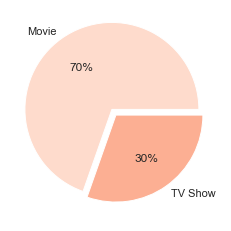

In [1154]:
data = netflix_data.groupby("type")['type'].count()

explode=(0.08,0)
labels = ['Movie', 'TV Show']
colors = sns.color_palette("Reds")
plt.pie(data, labels=labels,colors = colors, autopct = '%0.0f%%', explode = explode)
plt.show()

### Inference
  - Netflix has **70%** of its content as movies
  - **Movies** are clearly more **popular on Netflix than TV shows**.


### Checking number of new Contents added yearly

Text(0.5, 0, 'Year -> (Movies added to Netflix) ')

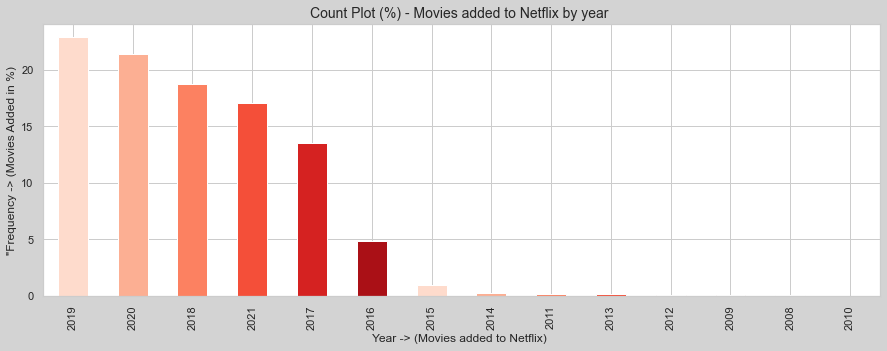

In [1155]:
fig = plt.figure(figsize=(15,5))
sns.set(style='whitegrid')
fig.set_facecolor("lightgrey")
count = (netflix_date['year_added'].value_counts(normalize=True)*100)
count.plot.bar(color=sns.color_palette('Reds'))
plt.title('Count Plot (%) - Movies added to Netflix by year ', fontsize=14)
plt.ylabel('"Frequency -> (Movies Added in %)', fontsize=12)
plt.xlabel('Year -> (Movies added to Netflix) ', fontsize=12)

Text(0.5, 0, 'Year -> (Movies added to Netflix) ')

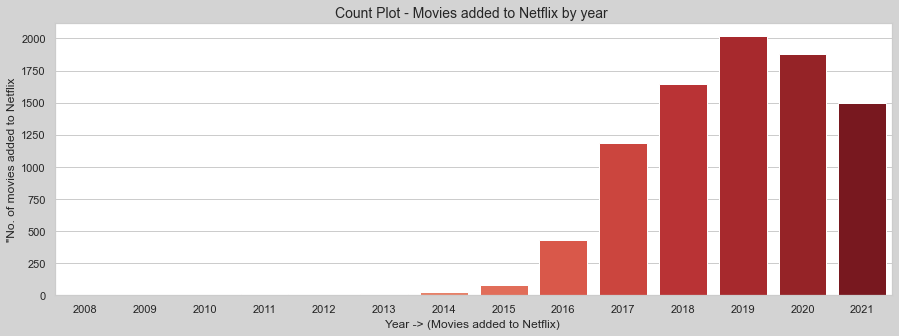

In [1156]:
fig = plt.figure(figsize=(15,5))
sns.set(style='whitegrid')
fig.set_facecolor("lightgrey")
sns.countplot(data=netflix_date,x = 'year_added',palette ="Reds")
plt.title('Count Plot - Movies added to Netflix by year ', fontsize=14)
plt.ylabel('"No. of movies added to Netflix', fontsize=12)
plt.xlabel('Year -> (Movies added to Netflix) ', fontsize=12)

### Inference
  - According to the above graph, Netflix has started adding content since 2014.
  - The popularity of OTT has boomed in the last 5 years, so we're seeing a dramatic increase in content being added.
  - There were **2000 (23%) Movies and TV shows** added in the year 2019 (Highest until date).


### Checking number of new Contents added montly

Text(0.5, 0, 'Month -> (Movies added to Netflix) ')

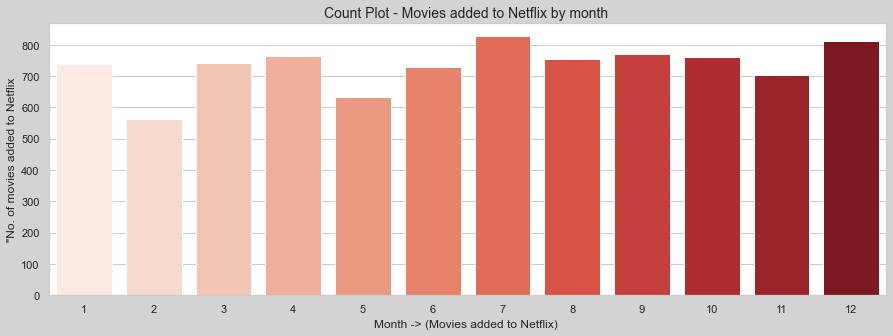

In [1157]:
fig = plt.figure(figsize=(15,5))
sns.set(style='whitegrid')
fig.set_facecolor("lightgrey")
sns.countplot(data=netflix_date,x = 'month_added',palette ="Reds")
plt.title('Count Plot - Movies added to Netflix by month ', fontsize=14)
plt.ylabel('"No. of movies added to Netflix', fontsize=12)
plt.xlabel('Month -> (Movies added to Netflix) ', fontsize=12)

### Inference
  - Each month, we see consistent content additions.

### Checking number of new Contents on Weekends

Text(0.5, 0, 'Year on which Movies added on Netflix')

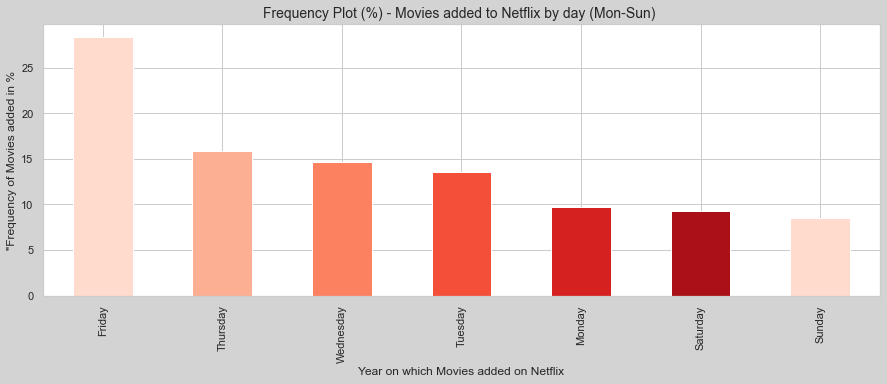

In [1158]:
fig = plt.figure(figsize=(15,5))
sns.set(style='whitegrid')
fig.set_facecolor("lightgrey")
count = (netflix_date['Weekday_added'].value_counts(normalize=True)*100)
count.plot.bar(color=sns.color_palette('Reds'))
plt.title('Frequency Plot (%) - Movies added to Netflix by day (Mon-Sun) ', fontsize=14)
plt.ylabel('"Frequency of Movies added in %', fontsize=12)
plt.xlabel('Year on which Movies added on Netflix', fontsize=12)

Text(0.5, 1.0, 'Count Plot - Movies added to Netflix by day (Mon-Sun) ')

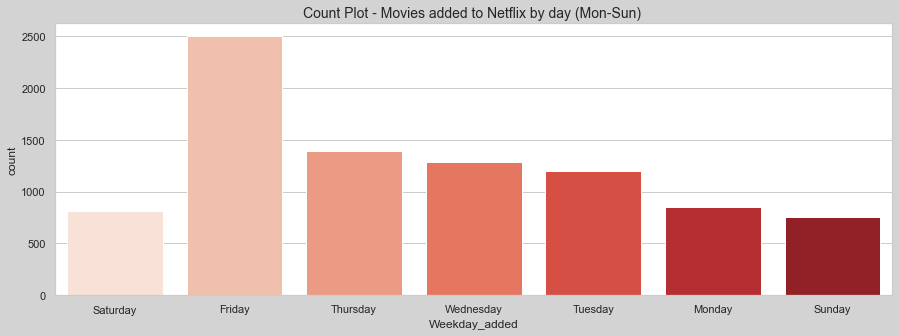

In [1159]:
fig = plt.figure(figsize=(15,5))
sns.set(style='whitegrid')
fig.set_facecolor("lightgrey")
sns.countplot(data=netflix_date,x = 'Weekday_added',palette ="Reds")
plt.title('Count Plot - Movies added to Netflix by day (Mon-Sun) ', fontsize=14)

### Inference
  - Netflix adds **45%** of its content on Thursdays and Fridays.
  - **On Friday, new content should be added.**
  - Over the weekend, less than 20% of content is added.

### Checking when should new content be added to the site.

Text(0.5, 0, 'Date on which Movies added on Netflix')

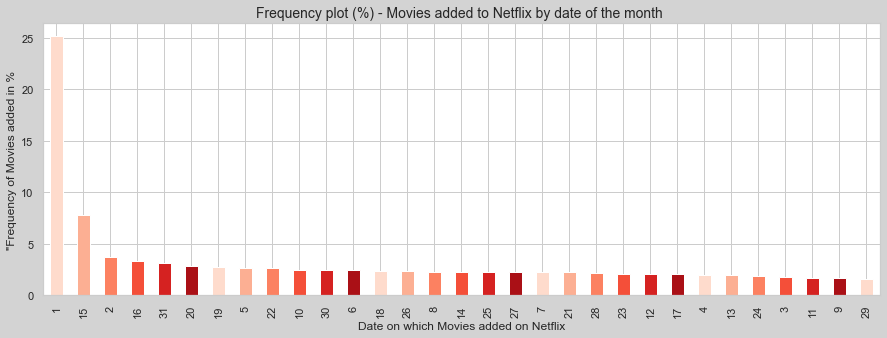

In [1160]:
fig = plt.figure(figsize=(15,5))
sns.set(style='whitegrid')
fig.set_facecolor("lightgrey")
count = (netflix_date['day_added'].value_counts(normalize=True)*100)
count.plot.bar(color=sns.color_palette('Reds'))
plt.title('Frequency plot (%) - Movies added to Netflix by date of the month ', fontsize=14)
plt.ylabel('"Frequency of Movies added in %', fontsize=12)
plt.xlabel('Date on which Movies added on Netflix', fontsize=12)

### Inference 
  - It was evident that **1st of every month** was when the most content was added.

### Distribution of Release year 

In [1161]:
bins = [1941,2000,2011,2014,2016,2018,2020,2021]
netflix_date_v1 = netflix_date.groupby(pd.cut(netflix_date['release_year'], bins=bins)).release_year.count()
bins = [1941,2000,2011,2013,2021]
netflix_date_v2 = netflix_date.groupby(pd.cut(netflix_date['release_year'], bins=bins)).release_year.count()

In [1162]:
netflix_date_bin = netflix_date_v1.to_frame()
netflix_date_bin.rename(columns = {"release_year":"count"},inplace= True)
netflix_date_bin1 = netflix_date_v2.to_frame()
netflix_date_bin1.rename(columns = {"release_year":"count"},inplace= True)

<AxesSubplot:title={'center':'Bar plot - based on release_year of Movies & TV shows'}, xlabel='release_year', ylabel='count'>

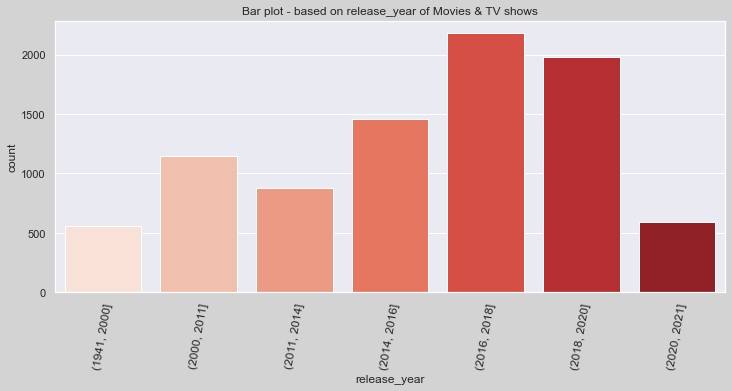

In [1163]:
fig = plt.figure(figsize=(12,5))
sns.set(style = "darkgrid")
fig.set_facecolor("lightgrey")
plt.title('Bar plot - based on release_year of Movies & TV shows', fontsize=12)
plt.ylabel('"Count of Movies & TV shows release by year', fontsize=12)
plt.xlabel('Bin of release year ', fontsize=12)
plt.xticks(rotation = 80,fontsize=12)
sns.barplot(x=netflix_date_bin.index,y='count',data=netflix_date_bin,palette="Reds")

<AxesSubplot:title={'center':'Bar plot - based on release_year of Movies & TV shows'}, xlabel='release_year', ylabel='count'>

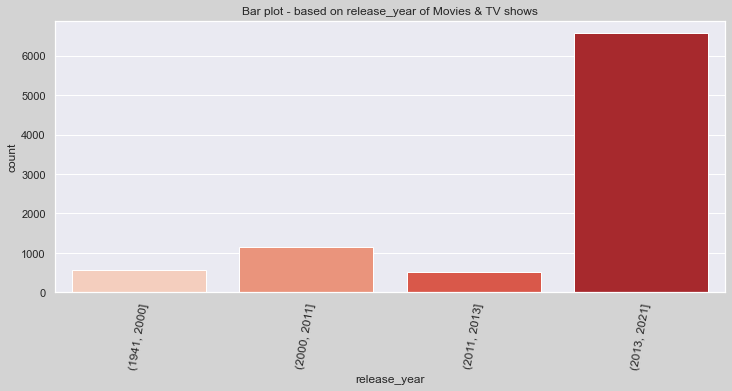

In [1164]:
fig = plt.figure(figsize=(12,5))
sns.set(style = "darkgrid")
fig.set_facecolor("lightgrey")
plt.title('Bar plot - based on release_year of Movies & TV shows', fontsize=12)
plt.ylabel('"Count of Movies & TV shows release by year', fontsize=12)
plt.xlabel('Bin of release year ', fontsize=12)
plt.xticks(rotation = 80,fontsize=12)
sns.barplot(x=netflix_date_bin1.index,y='count',data=netflix_date_bin1,palette="Reds")

### Inference
  - Netflix began adding content in 2014 as indicated by the "added_year" analysis mentioned above.
  - Added content has a release date ranging from 2014 till now for 75% of movies and TV shows. This shows Netflix encourages content creators to add new content in the platform.
  - **New content creators have a lot of opportunities to share their content on Netflix.**

### Identify how content is distributed based on maturity level - kids, teens, and adults

(array([0, 1, 2]),
 [Text(0, 0, 'Adults'), Text(1, 0, 'Teenagers'), Text(2, 0, 'Kids')])

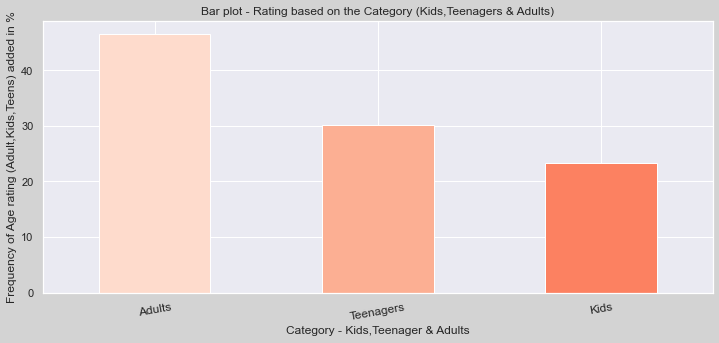

In [1165]:
fig = plt.figure(figsize=(12,5))
sns.set(style = "darkgrid")
fig.set_facecolor("lightgrey")
count = netflix_data['ratings_cat'].value_counts(normalize=True)*100
count.plot.bar(color=sns.color_palette('Reds'))
plt.title('Bar plot - Rating based on the Category (Kids,Teenagers & Adults)', fontsize=12)
plt.ylabel('Frequency of Age rating (Adult,Kids,Teens) added in %', fontsize=12)
plt.xlabel('Category - Kids,Teenager & Adults', fontsize=12)
plt.xticks(rotation = 10,fontsize=12)

Text(0.5, 0, 'Category ')

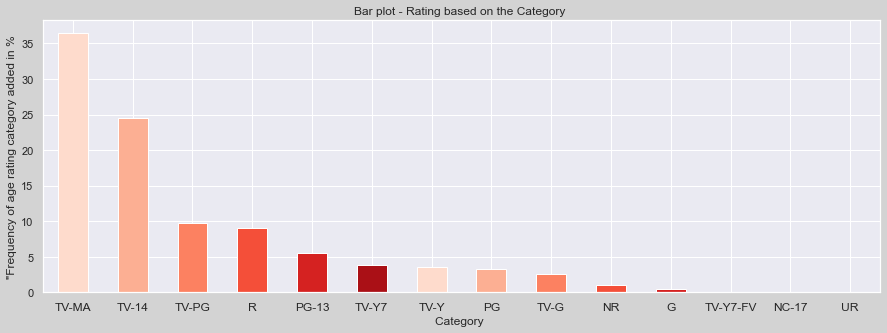

In [1188]:
fig = plt.figure(figsize=(15,5))
sns.set(style = "darkgrid")
fig.set_facecolor("lightgrey")
count = netflix_data['rating'].value_counts(normalize=True)*100
count.plot.bar(color=sns.color_palette('Reds'))
plt.xticks(rotation = 0,fontsize=12)
plt.title('Bar plot - Rating based on the Category ', fontsize=12)
plt.ylabel('"Frequency of age rating category added in %', fontsize=12)
plt.xlabel('Category ', fontsize=12)

### Inference
  - On Netflix, **48%** of the content (both Movies and TV shows) is for adults.
  - According to the graph above, more than **60%** of "TV & Shows" content is not suitable for kids.
  - More **kid-friendly** content could increase subscriber numbers.

### Genres 

In [1167]:
genres = ", ".join(netflix_data['genres']).split(", ")
genres

genre_cnt = Counter()
for genre in genres:
    genre_cnt[genre] += 1

top_20_genre = genre_cnt.most_common(20)
netflix_genres = pd.DataFrame (top_20_genre, columns = ['Genres','Genres Count'])
netflix_genres.head()

,Genres,Genres Count
0,International Movies,2752
1,Dramas,2427
2,Comedies,1674
3,International TV Shows,1351
4,Documentaries,869


<AxesSubplot:title={'center':'Top 20 Genres count'}, xlabel='Genres', ylabel='Genres Count'>

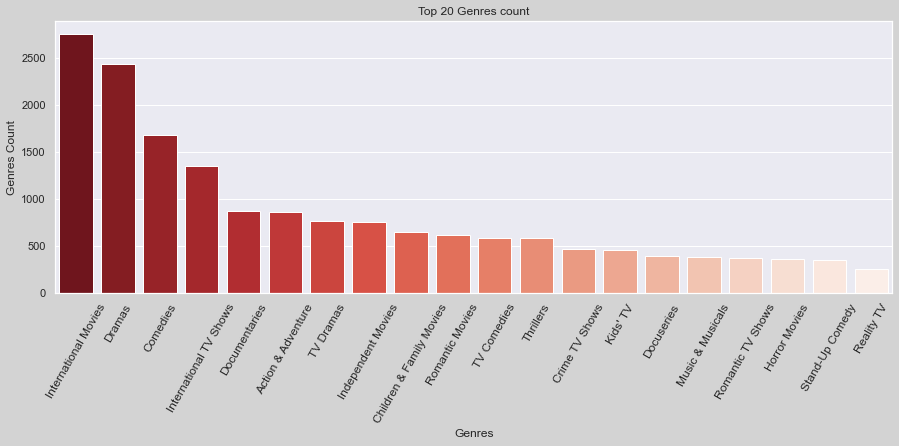

In [1189]:
fig = plt.figure(figsize=(15,5))
sns.set(style = "darkgrid")
fig.set_facecolor("lightgrey")
plt.title('Top 20 Genres count', fontsize=12)
plt.ylabel('"Count of Movies & TV shows by genres', fontsize=12)
plt.xlabel('Genres', fontsize=12)
plt.xticks(rotation = 60,fontsize=12)
sns.barplot(x='Genres',y='Genres Count',data=netflix_genres,palette="Reds_r")

### Inference
  - As can be seen from the graph above, **"International Movies & Dramas"** are the top genre contributor to Netflix.

### Top 20 cast contributed to Netflix content
  - Top 20 actors who have contributed the most movies to Netflix content.
  - Top 20 actors who have contributed the most TV shows to Netflix content.

### Top 20 actors who have contributed the most movies to Netflix content

In [1169]:
netflix_cast = netflix_data.groupby(["type","cast"])["cast"].count().unstack('type')
netflix_cast.columns =['Movie', 'TV Show']
netflix_movie_cast = netflix_cast[netflix_cast["Movie"].notnull()].iloc[:,:1]
netflix_movie_cast.reset_index(level='cast', inplace=True)
netflix_movie_cast.head()

,cast,Movie
0,"4Minute, B1A4, BtoB, ELSIE, EXID, EXO, Got7, I...",1.0
1,"50 Cent, Ryan Phillippe, Bruce Willis, Rory Ma...",1.0
2,"A.J. LoCascio, Sendhil Ramamurthy, Fred Tatasc...",1.0
3,A.R. Rahman,1.0
4,"Aadhi, Tapsee Pannu, Ritika Singh, Vennela Kis...",1.0


In [1170]:
movieCast = ", ".join(netflix_movie_cast['cast']).split(", ")
movieCast
cnt_movieCast = Counter()

for cast in movieCast:
    cnt_movieCast[cast] += 1

movieCast = cnt_movieCast.most_common(20)
netflix_movieCast = pd.DataFrame (movieCast, columns = ['Actor','Actor Count'])
netflix_movieCast.head()

,Actor,Actor Count
0,Anupam Kher,42
1,Shah Rukh Khan,35
2,Naseeruddin Shah,32
3,Om Puri,30
4,Akshay Kumar,30


<AxesSubplot:title={'center':'Top Actor count for Movies'}, xlabel='Actor', ylabel='Actor Count'>

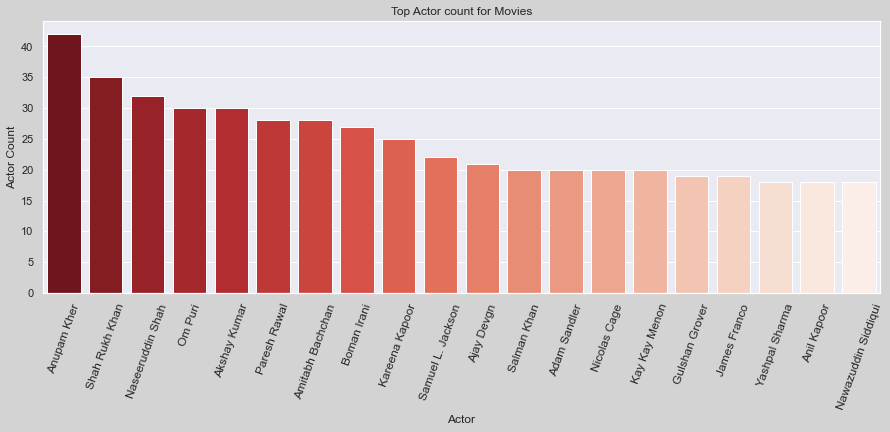

In [1190]:
fig = plt.figure(figsize=(15,5))
sns.set(style = "darkgrid")
fig.set_facecolor("lightgrey")
plt.title('Top Actor count for Movies', fontsize=12)
plt.ylabel('"Count of Movies by Actors', fontsize=12)
plt.xlabel('Actor Names', fontsize=12)
plt.xticks(rotation = 70,fontsize=12)
sns.barplot(x='Actor',y='Actor Count',data=netflix_movieCast,palette="Reds_r")

### Inference
  - Based on the above data, the majority of Netflix movies are **starring Indian actors.**

### Top 20 actors who have contributed the most TV shows to Netflix content.

In [1172]:
netflix_tv_show_cast = netflix_cast[netflix_cast["TV Show"].notnull()].iloc[:,1:2]
netflix_tv_show_cast.reset_index(level='cast', inplace=True)
tv_show_cast = ", ".join(netflix_tv_show_cast['cast']).split(", ")
tv_show_cast
cnt_tv_show_cast = Counter()

for cast in tv_show_cast:
    cnt_tv_show_cast[cast] += 1

tv_show_cast = cnt_tv_show_cast.most_common(20)
netflix_tvshow_cast = pd.DataFrame (tv_show_cast, columns = ['Actor','Actor Count'])
netflix_tvshow_cast.head()

,Actor,Actor Count
0,Takahiro Sakurai,25
1,Yuki Kaji,19
2,Junichi Suwabe,17
3,Daisuke Ono,17
4,Ai Kayano,17


<AxesSubplot:title={'center':'Top Actor count for TV Shows'}, xlabel='Actor', ylabel='Actor Count'>

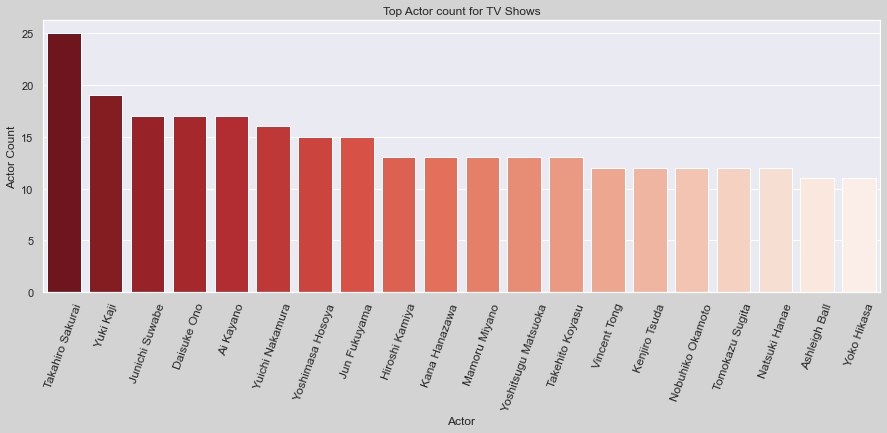

In [1191]:
fig = plt.figure(figsize=(15,5))
sns.set(style = "darkgrid")
fig.set_facecolor("lightgrey")
plt.title('Top Actor count for TV Shows', fontsize=12)
plt.ylabel('"Count of TV Shows by Actors', fontsize=12)
plt.xlabel('Actor Names', fontsize=12)
plt.xticks(rotation = 70,fontsize=12)
sns.barplot(x='Actor',y='Actor Count',data=netflix_tvshow_cast,palette="Reds_r")

### Inference
  - In TV and shows, there was a mix of stars from around the world.

### Distribution of Movie Duration

In [1174]:
netflix_data_mv = netflix_data[netflix_data["type"] == "Movie"]
netflix_data_mv['duration'] = netflix_data_mv['duration'].fillna(0.0).astype(float)

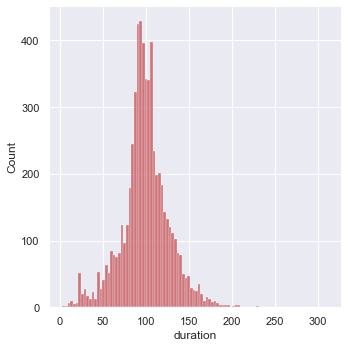

In [1175]:
sns.displot(data=netflix_data_mv,x='duration',bins=100,color="r")

### No. of seasons per TV Shows.

In [1176]:
netflix_season_cnt = netflix_data['season_cnt'].value_counts().reset_index()
netflix_season_cnt = netflix_season_cnt.rename(columns = {'season_cnt' : "count", "index" : 'season'})
netflix_season_cnt.loc[0,'season'] = 0
netflix_season_cnt.head()

,season,count
0,0,6131
1,1,1793
2,2,425
3,3,199
4,4,95


Text(0.5, 0, 'No. of Seasons')

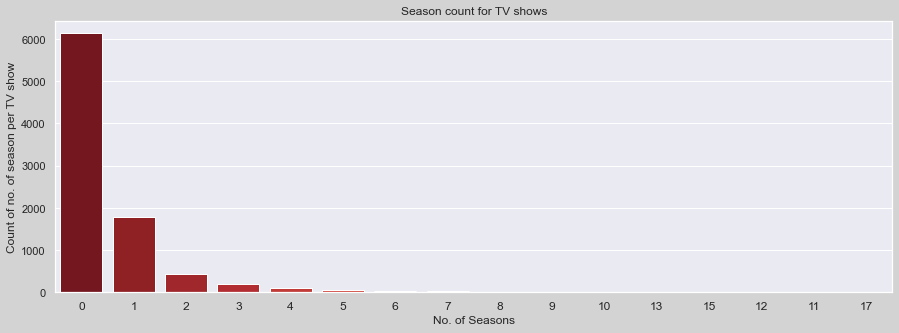

In [1177]:
fig = plt.figure(figsize=(15,5))
sns.set(style = "darkgrid")
fig.set_facecolor("lightgrey")
plt.title('Season count for TV shows', fontsize=12)
plt.xticks(rotation = 0,fontsize=12)
sns.barplot(x='season',y='count',data=netflix_season_cnt,palette="Reds_r")
plt.ylabel('Count of no. of season per TV show', fontsize=12)
plt.xlabel('No. of Seasons', fontsize=12)

### Distribution of Movies and TV Shows based on Country

In [1178]:
# splitting the countries in different rows 
netflix_country_data = netflix_data[['title','type', 'country' ]]
netflix_country_data = (netflix_country_data.drop('country', axis=1)
              .join(netflix_country_data.country.str.split(', ',expand=True).stack().reset_index(drop=True, level=1).rename('country')))
netflix_country_data.head()

,title,type,country
0,Dick Johnson Is Dead,Movie,United States
1,Blood & Water,TV Show,South Africa
2,Ganglands,TV Show,United States
3,Jailbirds New Orleans,TV Show,United States
4,Kota Factory,TV Show,India


In [1179]:
netflix_country_data.country.nunique()

127

In [1180]:
#as we can see we have records from 127 different countries, we'll only work with top 10 highest contributing countries
nf_country_top_15 = netflix_country_data.country.value_counts().sort_values(ascending=False)[:15]

Text(0.5, 0, 'Name of the country')

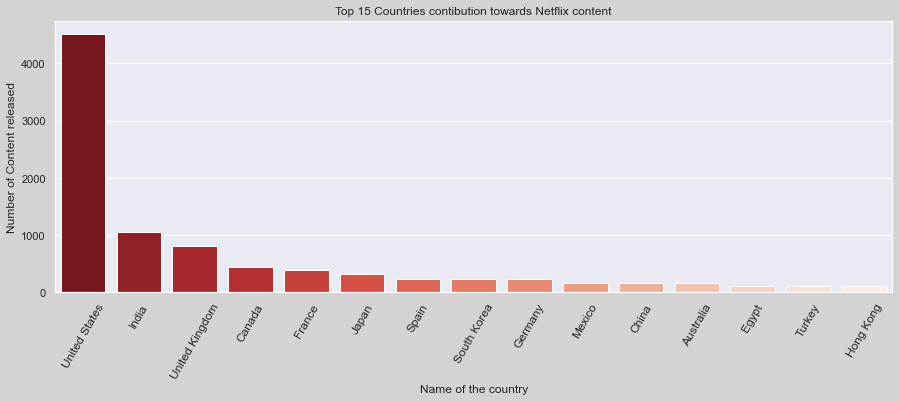

In [1181]:
fig = plt.figure(figsize=(15,5))
sns.set(style = "darkgrid")
fig.set_facecolor("lightgrey")
plt.title('Top 15 Countries contibution towards Netflix content', fontsize=12)
plt.xticks(rotation =60,fontsize=12)
sns.barplot(x=nf_country_top_15.index,y=nf_country_top_15.values,palette="Reds_r")
plt.ylabel('Number of Content released', fontsize=12)
plt.xlabel('Name of the country', fontsize=12)

### Inference
  - US is the top contributor, followed by India and UK.

## Bi-variant Analysis

## Bi-variante analysis for below mentioned variables
  - day content added and Type (Movie or Tv Show)
  - rating and type

### Day content added and Type (Movie or Tv Show)
  - As we have seen earlier that It was evident that 1st of every month was when the most content was added. Now it make sense to undersand how is the distribution based on Type.

Text(0.5, 1.0, 'Movies and TV Shows added added to Netflix by date ')

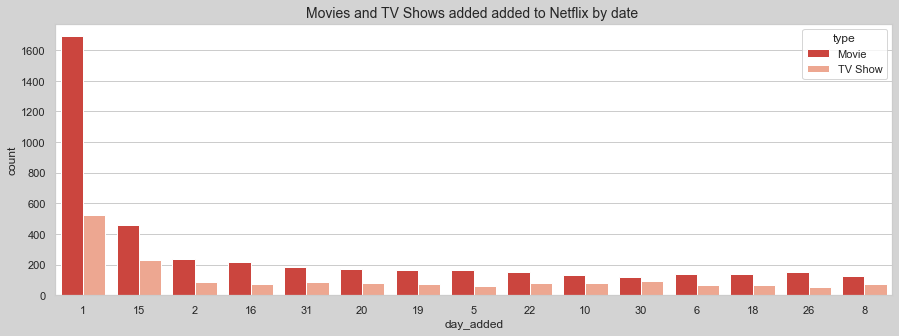

In [1182]:
fig = plt.figure(figsize=(15,5))
sns.set(style='whitegrid')
fig.set_facecolor("lightgrey")
sns.countplot(data=netflix_date,x = 'day_added',hue = 'type',palette ="Reds_r",
              order = netflix_date['day_added'].value_counts().index[0:15])
plt.title('Movies and TV Shows added added to Netflix by date ', fontsize=14)

### Infernce
  - It was evident that 1st of every month was when the most content was added. Among these, **71% are movies, while 21% are TV shows**.It highly recommend that **Movie are added at the beginning of every month**.

  - In addition, **Netflix will know when the majority of content is being added. If Netflix team needs to increase the servers, etc., they can work ahead of time.**

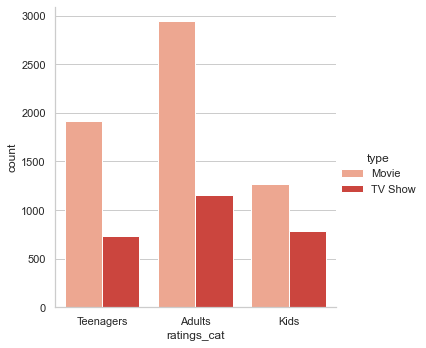

In [1183]:
sns.catplot(data=netflix_data, kind="count", x="ratings_cat", hue="type", palette="Reds")

Text(0.5, 1.0, 'Content available at Netflix based on the Maurity level ')

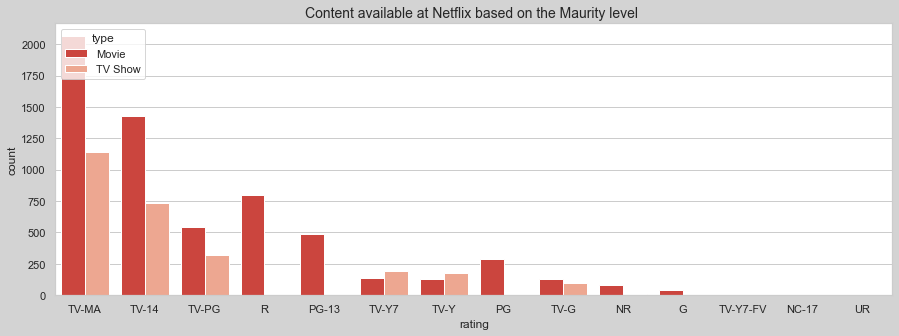

In [1184]:
fig = plt.figure(figsize=(15,5))
sns.set(style='whitegrid')
fig.set_facecolor("lightgrey")
sns.countplot(data=netflix_data,x = 'rating',hue = 'type',palette ="Reds_r",
              order = netflix_data['rating'].value_counts().index[0:15])
plt.title('Content available at Netflix based on the Maurity level ', fontsize=14)

## Summary of Final Recommendations
    
  - Only 25% of Netflix's content consists of movies and TV shows released before 2013. 
###### Recommendations 
    - **For more subscribers, Netflix should invest in classic Movies and TV shows.**

    
  - Netflix adds 45% of its content on Thursdays and Fridays. This may be due to the fact that people are likely to watch more content during weekends.
###### Recommendations - 
    - For **content creators or Netflix, Thursday and Friday are recommended dates to release content.**

    
  - It was evident that 1st of every month was when the most content was added. Among these, 71% are Movies, while 21% are TV shows.
###### Recommendations -
    - It highly **recommend that Movies be added at the beginning of every month**.
    - In addition, **Netflix will know when the majority of content is being added. If Netflix team needs to increase the servers, etc., they can work ahead of time and it will have one time cost per month or quarter.**


  - Netflix began adding content in 2014 as indicated by the "added_year" analysis mentioned above. Added content has a release date ranging from 2014 till now for 75% of movies and TV shows. This shows Netflix encourages content creators to add new content in the platform.
###### Recommendations -
    - **New content creators have a lot of opportunities to share their content on Netflix.**


  - On Netflix, **48%** of the content (both Movies and TV shows) is for adults.Based on the analysis, more than **60%** of "TV & Shows" content is not suitable for kids.
###### Recommendations -
    - More **kid-friendly** content could increase subscriber numbers.